In [1]:
import cfg
from visualize import *

Prediction took 962.34655 ms.
truck     : 0.381127
dog       : 0.225089
boat      : 0.132294
motorcycle: 0.092083
save plot results to preds/dog.jpg


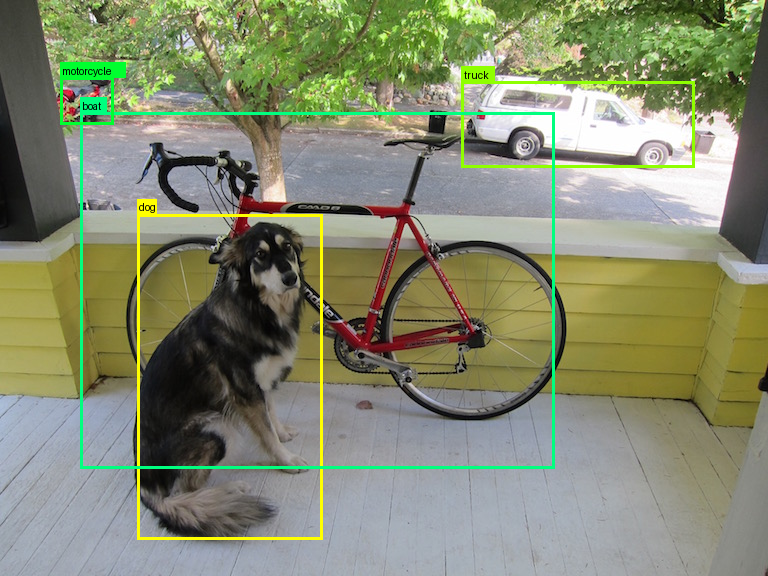

In [2]:
predict(
    model=cfg.MODEL,
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/dog.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/dog.jpg'
    )

✅ 已載入 int8 模型
⏱️  194.70 ms,  detect 3 boxes
motorcycle: 0.211389
car       : 0.044039
dog       : 0.036750
save plot results to demo_out.jpg
📷  已存檔：demo_out.jpg


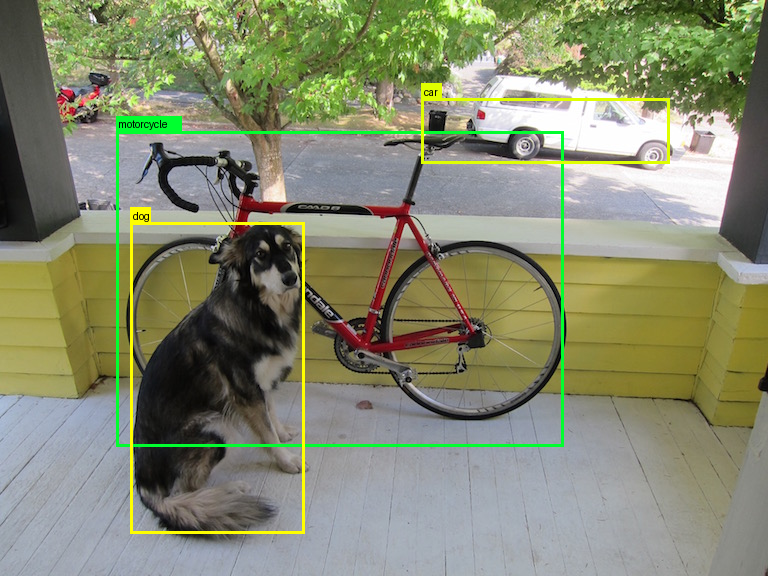

In [33]:
predict_quant("images/dog.jpg",
              "yolov2_int8_fbgemm.pth",
              conf_thresh=0.09,
              nms_thresh=0.5,
              class_names=cfg.CLASS_NAMES,
              save_path="demo_out.jpg")

In [3]:
from model import YoloV2Net
import torch
model = YoloV2Net(num_classes=80)
model.load_state_dict(torch.load("yolov2_pot2_weightonly.pth"))

C:\Users\bend0\AppData\Local\Temp\ipykernel_12392\981540891.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("yolov2_pot2_weightonly.pth"

<All keys matched successfully>

C:\Users\bend0\AppData\Local\Temp\ipykernel_36392\3462135586.py:46: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\bend0\AppData\Local\Temp\ipykernel_36392\3462135586.py:46: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\bend0\AppData\Local\Temp\ipykernel_36392\3462135586.py:46: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.tight_layout()


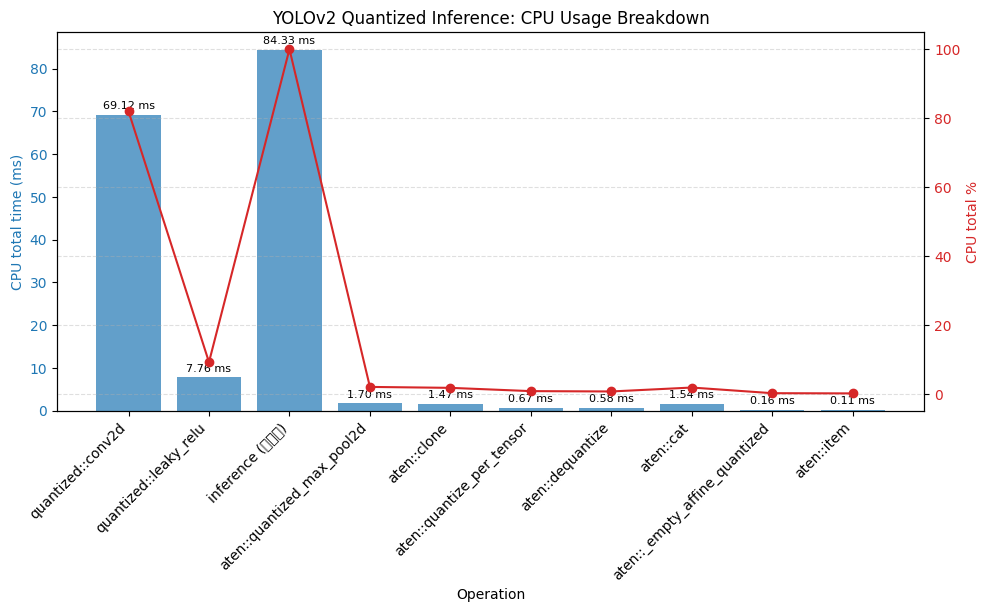

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 整理輸入資料為 DataFrame
data = {
    "Name": [
        "quantized::conv2d", "quantized::leaky_relu", "inference", "aten::quantized_max_pool2d",
        "aten::clone", "aten::quantize_per_tensor", "aten::dequantize", "aten::cat",
        "aten::_empty_affine_quantized", "aten::item"
    ],
    "CPU total (ms)": [
        69.125, 7.759, 84.332, 1.696, 1.471, 0.6671, 0.5779, 1.542, 0.1621, 0.1055
    ],
    "CPU total %": [
        81.97, 9.20, 100.0, 2.01, 1.74, 0.79, 0.69, 1.83, 0.19, 0.13
    ]
}
df = pd.DataFrame(data)

# 畫圖：雙軸 - CPU time + CPU%
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Operation')
ax1.set_ylabel('CPU total time (ms)', color=color)
bar1 = ax1.bar(df['Name'], df['CPU total (ms)'], color=color, alpha=0.7, label='CPU time (ms)')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

# 添加數值標籤
for rect in bar1:
    height = rect.get_height()
    ax1.annotate(f'{height:.2f} ms',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

# 第二個 Y 軸畫 CPU 百分比
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CPU total %', color=color)
line2 = ax2.plot(df['Name'], df['CPU total %'], color=color, marker='o', label='CPU %')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("YOLOv2 Quantized Inference: CPU Usage Breakdown")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


PTQ prediction took 33.07843 ms.
Using quantized model: ./yolov2_pot2_weightonly.pth
Number of detected boxes: 2
Box 0: [0.606, 0.4419, 0.5597, 0.904, 0.8916, 0.0755, 23.0]
Box 1: [0.6625, 0.6519, 0.36, 0.472, 0.8044, 0.0867, 22.0]
zebra     : 0.086669
giraffe   : 0.075505
save plot results to demo_out_ptq.jpg


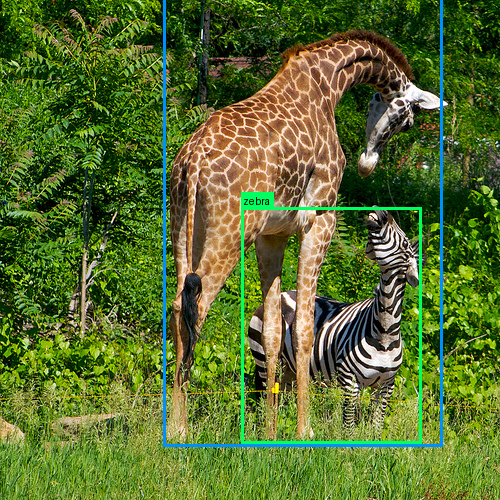

In [21]:
predict_ptq(
    model_path="./yolov2_pot2_weightonly.pth",
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/giraffe.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='demo_out_ptq.jpg'
    )

In [ ]:
predict_ptq_rescaled(
    model_path="./yolov2_pot2_weightonly.pth",
    img_path='images/Trucks-2.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/Trucks-2_rescaled.jpg',
    confidence_scale=2000  # Adjust this value as needed
)

In [ ]:
# For original model
from model import YoloV2Net, load_weights
from torchvision import transforms
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
orig_model = YoloV2Net(num_classes=80)
load_weights(orig_model, "weights/yolov2.weights")
orig_model.to(device)

# Test both models on same image
img = Image.open("test.jpg").convert('RGB')
tensor_img = transforms.ToTensor()(img.resize((608, 608))).unsqueeze(0).to(device)

# Check outputs before NMS
with torch.no_grad():
    orig_output = orig_model(tensor_img).data
    # Print raw confidence values from last layer
    print("Original model max confidence:", orig_output[0, 4::85].sigmoid().max().item())
    
    # Load quantized model
    quant_model = YoloV2Net(num_classes=80)
    quant_model.load_state_dict(torch.load("yolov2_pot2_weightonly.pth"))
    quant_model.to(device)
    quant_output = quant_model(tensor_img).data
    print("Quantized model max confidence:", quant_output[0, 4::85].sigmoid().max().item())

In [ ]:
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from model import YoloV2Net, load_weights, load_model_from_weight
from utils import filtered_boxes, plot_boxes

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def compare_model_confidence(
    original_weights_path,
    quantized_weights_path,
    image_path,
    num_classes=80,
    device="cuda" if torch.cuda.is_available() else "cpu"
):
    """
    Compare confidence scores between original and quantized models.
    """
    # Load original model
    orig_model = YoloV2Net(num_classes=num_classes)
    load_weights(orig_model, original_weights_path)
    orig_model.to(device)
    orig_model.eval()
    
    # Load quantized model
    quant_model = YoloV2Net(num_classes=num_classes)
    quant_model.load_state_dict(torch.load(quantized_weights_path, map_location=device))
    quant_model.to(device)
    quant_model.eval()
    
    # Load and prepare image
    img = Image.open(image_path).convert('RGB')
    tensor_img = transforms.ToTensor()(img.resize((608, 608))).unsqueeze(0).to(device)
    
    # Run inference
    with torch.no_grad():
        # Forward pass through both models
        orig_output = orig_model(tensor_img).data
        quant_output = quant_model(tensor_img).data
        
        # Extract and prepare objectness confidence scores properly
        # YOLOv2 format: For each anchor box, outputs [x, y, w, h, obj, class1, class2, ...]
        num_anchors = orig_model.num_anchors
        
        # Calculate objectness scores (index 4 of each anchor's output)
        batch, channels, height, width = orig_output.shape
        # Reshape to isolate the objectness scores
        obj_idx = 4  # Index for objectness score in the output format
        
        orig_obj_scores = []
        quant_obj_scores = []
        
        for a in range(num_anchors):
            # Extract objectness score for each anchor
            start_idx = a * (5 + num_classes) + obj_idx
            orig_obj_scores.append(orig_output[0, start_idx, :, :].sigmoid().cpu().numpy().flatten())
            quant_obj_scores.append(quant_output[0, start_idx, :, :].sigmoid().cpu().numpy().flatten())
        
        # Combine scores from all anchors
        orig_obj_conf = np.concatenate(orig_obj_scores)
        quant_obj_conf = np.concatenate(quant_obj_scores)
        
        print(f"Original model max objectness: {orig_obj_conf.max():.6f}")
        print(f"Quantized model max objectness: {quant_obj_conf.max():.6f}")
        
        # Calculate ratio of confidence reduction
        if orig_obj_conf.max() > 0:
            conf_ratio = quant_obj_conf.max() / orig_obj_conf.max()
            print(f"Confidence ratio (quantized/original): {conf_ratio:.6f}")
        
        # Compare class confidence distributions (extract max class confidence for each position)
        orig_class_scores = []
        quant_class_scores = []
        
        for a in range(num_anchors):
            for c in range(num_classes):
                start_idx = a * (5 + num_classes) + 5 + c  # 5 for bbox + obj, then add class index
                orig_class_scores.append(orig_output[0, start_idx, :, :].cpu().numpy().flatten())
                quant_class_scores.append(quant_output[0, start_idx, :, :].cpu().numpy().flatten())
        
        # Convert to numpy arrays and apply softmax
        orig_class_scores = np.array(orig_class_scores).T  # Transpose to get classes as columns
        quant_class_scores = np.array(quant_class_scores).T
        
        # Calculate max class confidence per position
        orig_max_class = np.max(orig_class_scores, axis=1)
        quant_max_class = np.max(quant_class_scores, axis=1)
        
        print(f"Original model max class conf: {orig_max_class.max():.6f}")
        print(f"Quantized model max class conf: {quant_max_class.max():.6f}")
        
        # Plot confidence histograms
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(orig_obj_conf, bins=20, alpha=0.5, label='Original')
        plt.hist(quant_obj_conf, bins=20, alpha=0.5, label='Quantized')
        plt.title('Objectness Confidence Distribution')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.hist(orig_max_class, bins=20, alpha=0.5, label='Original')
        plt.hist(quant_max_class, bins=20, alpha=0.5, label='Quantized')
        plt.title('Max Class Confidence Distribution')
        plt.legend()
        plt.tight_layout()
        plt.savefig('confidence_comparison.png')
        print("Saved confidence histogram to confidence_comparison.png")

def compare_layer_outputs(
    original_weights_path,
    quantized_weights_path,
    image_path,
    num_classes=80,
    device="cuda" if torch.cuda.is_available() else "cpu"
):
    """
    Compare layer outputs between original and quantized models.
    """
    # Load models
    orig_model = YoloV2Net(num_classes=num_classes)
    load_weights(orig_model, original_weights_path)
    orig_model.to(device)
    orig_model.eval()
    
    quant_model = YoloV2Net(num_classes=num_classes)
    quant_model.load_state_dict(torch.load(quantized_weights_path, map_location=device))
    quant_model.to(device)
    quant_model.eval()
    
    # Prepare hook for layer outputs
    layer_outputs_orig = {}
    layer_outputs_quant = {}
    
    def get_hook(name, outputs_dict):
        def hook(module, input, output):
            outputs_dict[name] = output.detach().cpu()
        return hook
    
    # Register hooks for key layers
    hooks_orig = []
    hooks_quant = []
    
    # You might need to adjust these layer names based on your model architecture
    # Find some late-stage convolutional layers that are important for detection
    key_layers = []
    for name, module in orig_model.named_modules():
        if isinstance(module, nn.Conv2d):
            if 'conv' in name and name.endswith(('81', '82', '83')):  # Adjust based on your model
                key_layers.append(name)
    
    # If no specific layers found, use any available convolutional layer
    if not key_layers:
        for name, module in orig_model.named_modules():
            if isinstance(module, nn.Conv2d):
                key_layers.append(name)
                break
    
    print(f"Analyzing layers: {key_layers}")
    
    # Register hooks
    for name, module in orig_model.named_modules():
        if name in key_layers:
            hooks_orig.append(module.register_forward_hook(
                get_hook(name, layer_outputs_orig)
            ))
    
    for name, module in quant_model.named_modules():
        if name in key_layers:
            hooks_quant.append(module.register_forward_hook(
                get_hook(name, layer_outputs_quant)
            ))
    
    # Load and prepare image
    img = Image.open(image_path).convert('RGB')
    tensor_img = transforms.ToTensor()(img.resize((608, 608))).unsqueeze(0).to(device)
    
    # Run inference
    with torch.no_grad():
        orig_model(tensor_img)
        quant_model(tensor_img)
    
    # Compare layer outputs
    for layer_name in layer_outputs_orig:
        if layer_name in layer_outputs_quant:
            orig_out = layer_outputs_orig[layer_name]
            quant_out = layer_outputs_quant[layer_name]
            
            # Convert to numpy arrays for plotting
            orig_out_np = orig_out.numpy().flatten()
            quant_out_np = quant_out.numpy().flatten()
            
            # Calculate error metrics
            abs_diff = np.abs(orig_out_np - quant_out_np)
            mean_error = np.mean(abs_diff)
            max_error = np.max(abs_diff)
            
            print(f"Layer {layer_name}:")
            print(f"  Mean absolute error: {mean_error:.6f}")
            print(f"  Max absolute error: {max_error:.6f}")
            
            # Plot distribution of differences
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.hist(orig_out_np, bins=50, alpha=0.5, label='Original')
            plt.hist(quant_out_np, bins=50, alpha=0.5, label='Quantized')
            plt.title(f'Layer {layer_name} Output Distribution')
            plt.legend()
            
            plt.subplot(1, 2, 2)
            plt.hist(abs_diff, bins=50)
            plt.title(f'Layer {layer_name} Absolute Error')
            plt.tight_layout()
            plt.savefig(f'layer_{layer_name}_comparison.png')
            print(f"Saved layer comparison to layer_{layer_name}_comparison.png")
    
    # Remove hooks
    for hook in hooks_orig + hooks_quant:
        hook.remove()

def compare_detections(
    original_weights_path,
    quantized_weights_path,
    image_path,
    class_names,
    conf_thresh=1e-5,  # CHANGED: Using a much lower threshold to catch more boxes
    nms_thresh=0.4,
    num_classes=80,
    device="cuda" if torch.cuda.is_available() else "cpu"
):
    """
    Compare object detections between original and quantized models.
    """
    # Load models - fix the loading to be consistent
    orig_model = YoloV2Net(num_classes=num_classes)
    load_weights(orig_model, original_weights_path)  # Use consistent loading method
    orig_model.to(device)
    orig_model.eval()
    
    quant_model = YoloV2Net(num_classes=num_classes)
    quant_model.load_state_dict(torch.load(quantized_weights_path, map_location=device))
    quant_model.to(device)
    quant_model.eval()
    
    # Load image
    img = Image.open(image_path).convert('RGB')
    
    # Get detections with very low threshold
    print(f"Using confidence threshold: {conf_thresh}")
    orig_boxes = filtered_boxes(orig_model, device, img.resize((608, 608)), conf_thresh, nms_thresh)
    quant_boxes = filtered_boxes(quant_model, device, img.resize((608, 608)), conf_thresh, nms_thresh)
    
    print(f"Original model detected {len(orig_boxes)} boxes")
    print(f"Quantized model detected {len(quant_boxes)} boxes")
    
    # Show top detections from each model
    print("\nTop detections from original model:")
    sorted_orig = sorted(orig_boxes, key=lambda x: x[4]*x[5], reverse=True)[:5]
    for i, box in enumerate(sorted_orig):
        cls_id = int(box[6])
        conf = box[4] * box[5]
        if isinstance(class_names, list):
            class_name = class_names[cls_id] if cls_id < len(class_names) else f"Class {cls_id}"
            print(f"  {i+1}. {class_name}: {conf:.6f}")
        else:
            print(f"  {i+1}. Class {cls_id}: {conf:.6f}")
    
    print("\nTop detections from quantized model:")
    sorted_quant = sorted(quant_boxes, key=lambda x: x[4]*x[5], reverse=True)[:5]
    for i, box in enumerate(sorted_quant):
        cls_id = int(box[6])
        conf = box[4] * box[5]
        if isinstance(class_names, list):
            class_name = class_names[cls_id] if cls_id < len(class_names) else f"Class {cls_id}"
            print(f"  {i+1}. {class_name}: {conf:.6f}")
        else:
            print(f"  {i+1}. Class {cls_id}: {conf:.6f}")
    
    # Create side-by-side visualization
    orig_img = img.copy()
    quant_img = img.copy()
    
    # Add text to indicate which image is which
    from PIL import ImageDraw, ImageFont
    try:
        font = ImageFont.truetype("arial.ttf", 24)
    except:
        font = ImageFont.load_default()
    
    draw_orig = ImageDraw.Draw(orig_img)
    draw_orig.text((20, 20), "Original Model", fill=(255, 0, 0), font=font)
    
    draw_quant = ImageDraw.Draw(quant_img)
    draw_quant.text((20, 20), "Quantized Model", fill=(255, 0, 0), font=font)
    
    # Ensure class_names is properly formatted for plot_boxes
    if not isinstance(class_names, list):
        # Create a dummy list of class names
        temp_class_names = [f"Class {i}" for i in range(num_classes)]
        orig_img = plot_boxes(orig_img, orig_boxes, None, temp_class_names)
        quant_img = plot_boxes(quant_img, quant_boxes, None, temp_class_names)
    else:
        orig_img = plot_boxes(orig_img, orig_boxes, None, class_names)
        quant_img = plot_boxes(quant_img, quant_boxes, None, class_names)
    
    # Create a side-by-side comparison image
    w, h = img.size
    comparison = Image.new('RGB', (w*2, h))
    comparison.paste(orig_img, (0, 0))
    comparison.paste(quant_img, (w, 0))
    
    # Save the comparison image
    comparison.save('detection_comparison.jpg')
    print("Saved detection comparison to detection_comparison.jpg")
    
    return comparison

if __name__ == "__main__":
    # Example usage:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    # Update these paths for your system
    original_weights = "weights/yolov2.weights"
    quantized_weights = "yolov2_pot2_weightonly.pth"
    test_image = "./images/Trucks-2.jpg"  # Replace with your test image
    
    # COCO class names
    COCO_CLASSES = [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
        'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
        'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
        'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 
        'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 
        'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 
        'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 
        'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 
        'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 
        'toothbrush'
    ]
    
    # Run detection comparison first with very low threshold to ensure we get boxes
    print("\n=== Running detection comparison with low threshold ===")
    compare_detections(original_weights, quantized_weights, test_image, COCO_CLASSES)
    
    # Then run the other comparisons
    print("\n=== Running confidence score comparison ===")
    compare_model_confidence(original_weights, quantized_weights, test_image)
    print("\n=== Running layer output comparison ===")
    compare_layer_outputs(original_weights, quantized_weights, test_image)


In [ ]:
predict_ptq(
    model_path="./yolov2_pot2_weightonly.pth",
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/dog.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/dogcv2.jpg'
    )

Prediction took 291.23664 ms.
horse     : 0.376001
person    : 0.357567
dog       : 0.268487
save plot results to preds/person.jpg


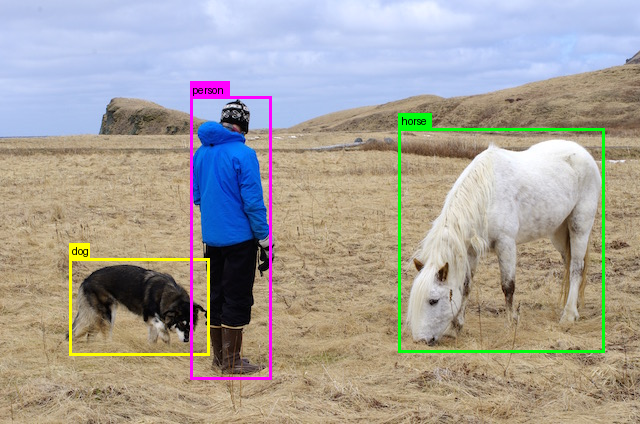

In [8]:
predict(
    model=cfg.MODEL,
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/person.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/person.jpg'
    )

Prediction took 314.22758 ms.
horse     : 0.099811
zebra     : 0.037355
horse     : 0.032380
horse     : 0.003577
save plot results to preds/horses.jpg


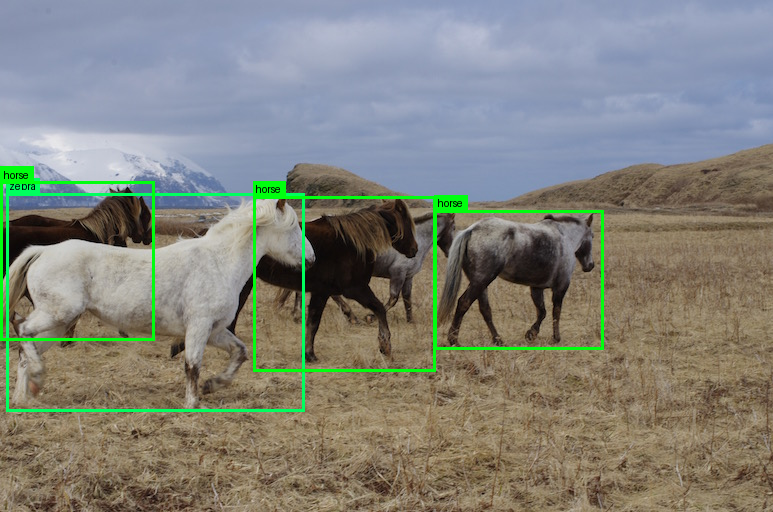

In [7]:
predict(
    model=cfg.MODEL,
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/horses.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/horses.jpg'
    )

Prediction took 321.56038 ms.
zebra     : 0.108049
giraffe   : 0.048312
save plot results to preds/giraffe.jpg


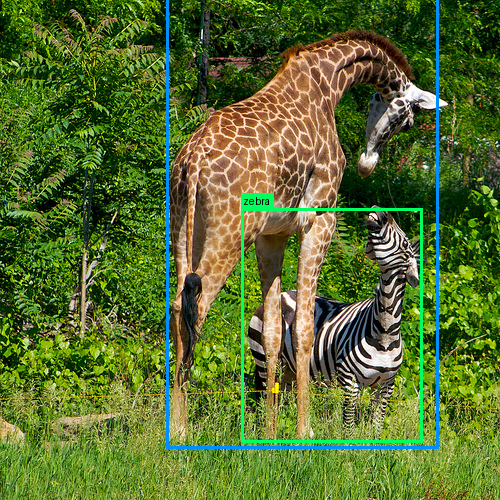

In [5]:
predict(
    model=cfg.MODEL,
    conf_thresh=0.4,
    nms_thresh=0.4,
    img_path='images/giraffe.jpg',
    class_names=cfg.CLASS_NAMES,
    device=cfg.DEVICE,
    save_to='preds/giraffe.jpg'
    )